In [174]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt
# from sklearn.grid_search import GridSearchCV

In [175]:
raw_data = sio.loadmat('D:\机器学习——Andrew_rag\code\ex6-SVM\data\ex6data1.mat')
print(raw_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [176]:
data = pd.DataFrame(raw_data['X'], columns=['x1', 'x2'])
data['y'] = raw_data['y']

data.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


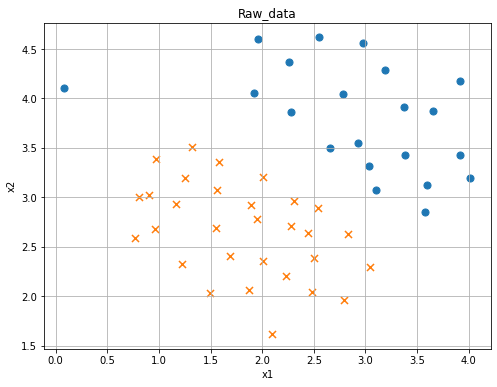

In [177]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(positive['x1'], positive['x2'], s=50, marker='o', label='Positive')
ax.scatter(negative['x1'], negative['x2'], s=50, marker='x', label='Negative')
ax.set_title('Raw_data')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# ax.grid(axis="both", color="black")
plt.grid()
plt.show()

# 线性SVM

In [178]:
from sklearn import svm
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc1.fit(data[['x1', 'x2']], data['y'])
svc1.score(data[['x1', 'x2']], data['y'])

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9803921568627451

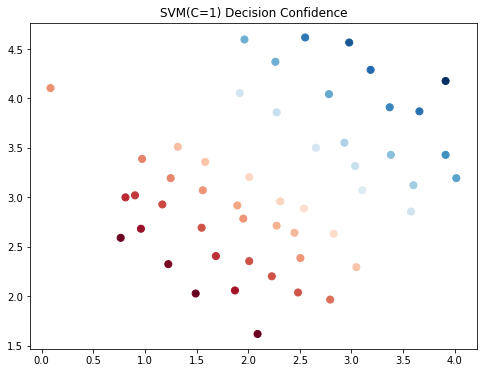

In [179]:
data['SVM1 Confidence'] = svc1.decision_function(data[['x1', 'x2']])
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['x1'], data['x2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM(C=1) Decision Confidence')
plt.show()

In [186]:
def plot_boundary(clf, data, title):
    x1min, x1max = np.min(data.iloc['x1',:]), np.max(data.iloc['x1',:])
    x2min, x2max = np.min(data.iloc['x2',:]), np.max(data.iloc['x2',:])
    u = np.linspace(x1min, x1max, 500)
    v = np.linspace(x2min, x2max, 500)
    xx, yy =np.meshgrid(u, v)
    z = clf.predict(np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1,1)),axis=1))
    z = z.reshape(xx.shape)
    plt.contour(xx, yy ,z, colors='b')
    plt.title(title)

In [187]:
# x = np.array(raw_data['X'])
# model = svm.SVC(C=1, kernel='linear')
# model.fit(x, data['y'])
plot_boundary(svc1, data[['x1', 'x2']], 'SVM(C=1) Decision boundary')
plt.show()

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [ ]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['x1', 'x2']], data['y'])
svc100.score(data[['x1', 'x2']], data['y'])

c:\ProgramData\Anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9803921568627451

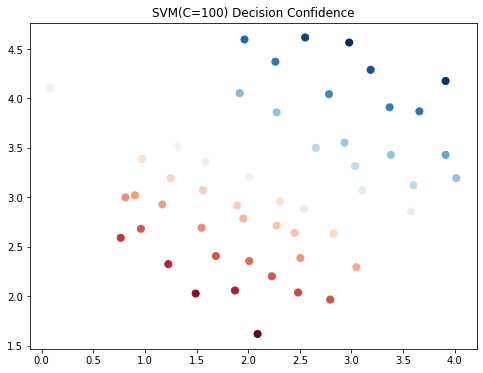

In [ ]:
data['SVM100 Confidence'] = svc100.decision_function(data[['x1', 'x2']])
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['x1'], data['x2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM(C=100) Decision Confidence')
plt.show()

# Gaussian Kernels

In [ ]:
def gaussian_kernels(x1, x2, sigma):
    return np.exp((- np.power((x1 - x2), 2).sum()) / (2 * (sigma ** 2)))

In [ ]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
gaussian_kernels(x1, x2, sigma)

0.32465246735834974

In [ ]:
raw_data_ga = sio.loadmat('D:\机器学习——Andrew_rag\code\ex6-SVM\data\ex6data2.mat')
print(raw_data_ga.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
data_ga = pd.DataFrame(raw_data_ga['X'], columns=['x1', 'x2'])
data_ga['y'] = raw_data_ga['y']

data_ga.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


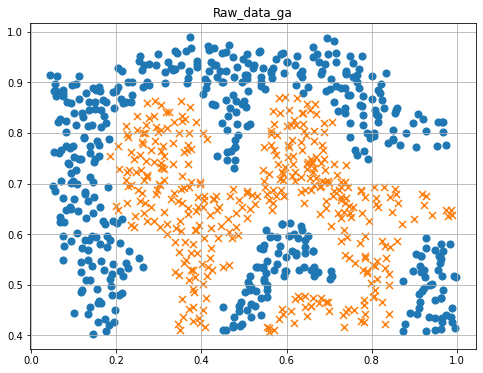

In [ ]:
positive_ga = data_ga[data_ga['y'].isin([1])]
negative_ga = data_ga[data_ga['y'].isin([0])]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive_ga['x1'], positive_ga['x2'], s=50, marker='o', label='Positive')
ax.scatter(negative_ga['x1'], negative_ga['x2'], s=50, marker='x', label='Negative')
ax.set_title('Raw_data_ga')
plt.grid()
plt.show()

In [ ]:
svc_ga = svm.SVC(C=100, kernel='rbf',gamma=10, probability=True)
svc_ga.fit(data_ga[['x1', 'x2']],data_ga['y'])
svc_ga.score(data_ga[['x1', 'x2']], data_ga['y'])

0.9698725376593279

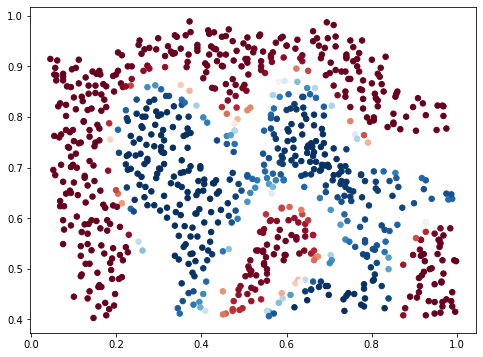

In [ ]:
data_ga['predict_prob'] = svc_ga.predict_proba(data_ga[['x1','x2']])[:, 0]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data_ga['x1'], data_ga['x2'], s=30, c=data_ga['predict_prob'], cmap='RdBu')
plt.show()

# 寻找最佳参数c和σ

In [ ]:
data3 = sio.loadmat('D:\机器学习——Andrew_rag\code\ex6-SVM\data\ex6data3.mat')
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [ ]:
training = pd.DataFrame(data3['X'], columns=['x1','x2'])
training['y'] = data3['y']
training.head()

,x1,x2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [ ]:
cv = pd.DataFrame(data3['Xval'], columns=['x1','x2'])
cv['y'] = data3['yval']
cv.head()

,x1,x2,y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


In [ ]:
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30,100]

combination = [(C, gamma) for C in candidate for gamma in candidate]
len(combination)

81

In [ ]:
search = []
for C, gamma in combination:
    svc = svm.SVC(C=C, gamma=gamma)
    svc.fit(training[['x1', 'x2']], training['y'])
    search.append(svc.score(cv[['x1', 'x2']], cv['y']))

In [ ]:
best_score = search[np.argmax(search)]
best_param = combination[np.argmax(search)]
print(best_score, best_param)

0.965 (0.3, 100)


In [ ]:
best_svm = svm.SVC(C=0.3, gamma=100)
best_svm.fit(training[['x1', 'x2']], training['y'])
ypred = best_svm.predict(cv[['x1', 'x2']])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       113
           1       0.95      0.97      0.96        87

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



# 垃圾邮件分类

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import scipy.io as sio
import re
from nltk.stem.porter import PorterStemmer

In [ ]:
def process_email(content):
    content = content.lower()
    content = re.sub(r'<.*>', '', content)
    content = re.sub(r'http[s]?:\\.+', 'httpaddr', content)
    content = re.sub(r'[\s]+@[\w]+.[\w]', 'emailaddr', content)
    content = re.sub(r'[\$][0-9]+', 'dollar number', content)
    content = re.sub(r'\$', 'dollar number', content)
    content = re.sub(r'[0-9]+', 'number', content)
    content = re.sub(r'[\W]+', ' ', content)
    words = content.split(' ')
    if words[0] == '':
        words = words[1:]
    porter_stemmer = PorterStemmer()
    for i in range(len(words)):
        words[i] = porter_stemmer.stem(words[i])
    return words

In [ ]:
spam_tr = sio.loadmat('D:\机器学习——Andrew_rag\code\ex6-SVM\data\spamTrain.mat')
print(spam_tr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
tr_x = spam_tr['X']
tr_y = spam_tr['y'].ravel()
tr_x.shape, tr_y.shape

((4000, 1899), (4000,))

In [ ]:
spam_test = sio.loadmat('D:\机器学习——Andrew_rag\code\ex6-SVM\data\spamTest.mat')
print(spam_test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])


In [ ]:
test_x = spam_test['Xtest']
test_y = spam_test['ytest'].ravel()
test_x.shape, test_y.shape

((1000, 1899), (1000,))

* SVM分类

In [ ]:
svc = svm.SVC()
svc.fit(tr_x, tr_y)
pred = svc.predict(test_x)
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       692
           1       0.99      0.97      0.98       308

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



* logistics regression分类

In [ ]:
logit = LogisticRegression()
logit.fit(tr_x, tr_y)
logit_pred = logit.predict(test_x)
print(metrics.classification_report(test_y, logit_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       692
           1       0.99      0.99      0.99       308

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

